In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading the dataset

df = pd.read_csv('/content/drive/MyDrive/Data/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#checking for the missing values

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.shape

(200, 4)

**DATA VISUALIZATION**

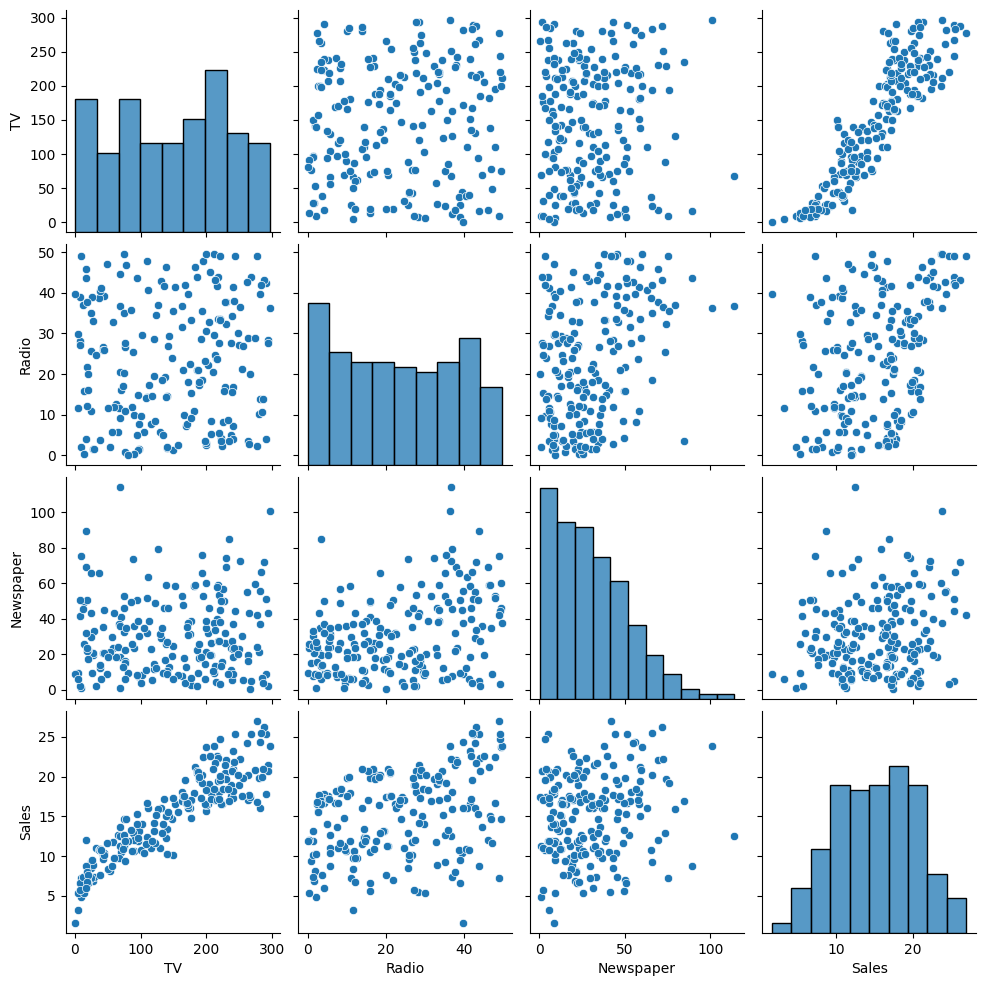

In [ ]:
#creating pairplot

sns.pairplot(df)
plt.show()


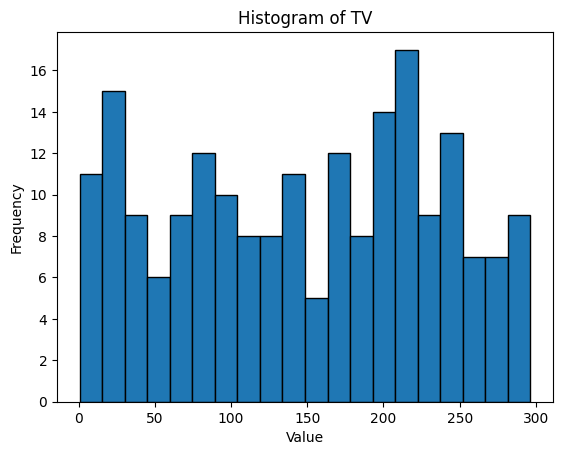

In [ ]:
#Visualizing the distribution of a single numerical variable using histograms:

plt.hist(df['TV'], bins=20, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TV')
plt.show()


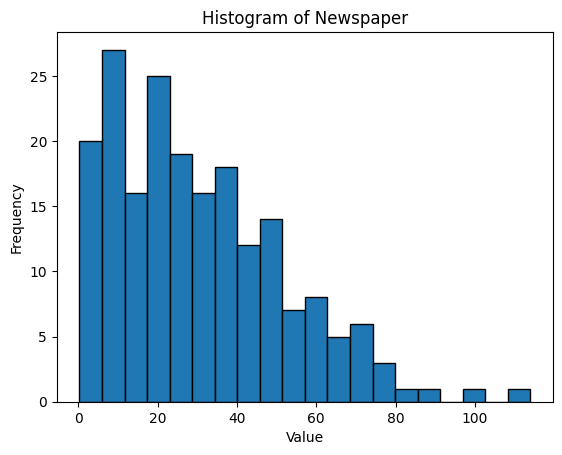

In [ ]:
plt.hist(df['Newspaper'], bins=20, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Newspaper')
plt.show()

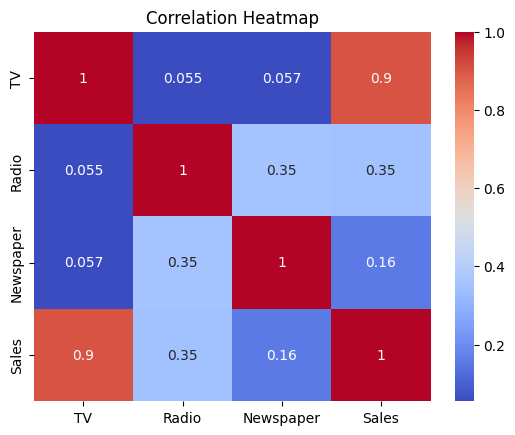

In [ ]:
#Visualizing the pairwise correlations between numerical variables:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


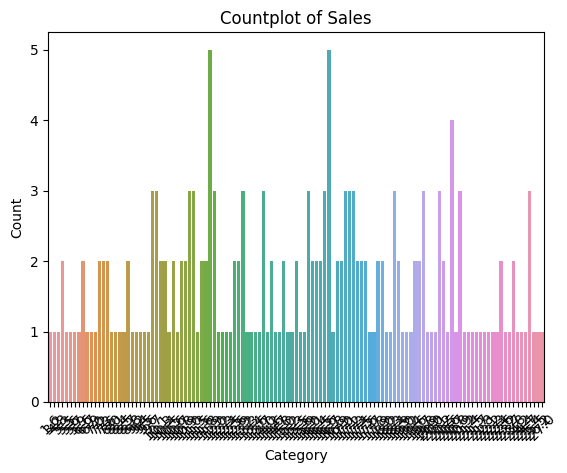

In [ ]:
#visualizing using countplot

sns.countplot(x='Sales', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Countplot of Sales')
plt.xticks(rotation=45)
plt.show()


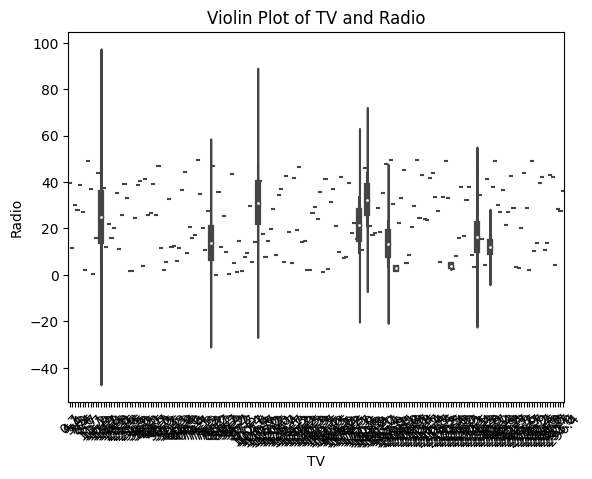

In [ ]:
#visualization using violin plot

sns.violinplot(x='TV', y='Radio', data=df)
plt.xlabel('TV')
plt.ylabel('Radio')
plt.title('Violin Plot of TV and Radio')
plt.xticks(rotation=45)
plt.show()


**Feature Engineering**

In [ ]:
df['new_feature'] = df['Radio'] + df['Sales']
df['new_feature']



0      59.9
1      49.7
2      57.9
3      57.8
4      28.7
       ... 
195    11.3
196    18.9
197    24.1
198    67.5
199    27.0
Name: new_feature, Length: 200, dtype: float64

**Splitting Data into Training and Testing Sets**



In [ ]:
#Splitting your data into training and testing sets.

x = df.drop('Sales', axis=1)
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x

,TV,Radio,Newspaper,new_feature
0,230.1,37.8,69.2,59.9
1,44.5,39.3,45.1,49.7
2,17.2,45.9,69.3,57.9
3,151.5,41.3,58.5,57.8
4,180.8,10.8,58.4,28.7
...,...,...,...,...
195,38.2,3.7,13.8,11.3
196,94.2,4.9,8.1,18.9
197,177.0,9.3,6.4,24.1
198,283.6,42.0,66.2,67.5


In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
x_test

,TV,Radio,Newspaper,new_feature
95,163.3,31.6,52.9,48.5
15,195.4,47.7,52.9,70.1
30,292.9,28.3,43.2,49.7
158,11.7,36.9,45.2,44.2
128,220.3,49.0,3.2,73.7
115,75.1,35.0,52.7,47.6
69,216.8,43.9,27.2,66.2
170,50.0,11.6,18.4,20.0
174,222.4,3.4,13.1,19.9
45,175.1,22.5,31.5,38.6


In [ ]:
x_train

,TV,Radio,Newspaper,new_feature
79,116.0,7.7,23.1,18.7
197,177.0,9.3,6.4,24.1
38,43.1,26.7,35.1,36.8
24,62.3,12.6,18.3,22.3
122,224.0,2.4,15.6,19.0
...,...,...,...,...
106,25.0,11.0,29.7,18.2
14,204.1,32.9,46.0,51.9
92,217.7,33.5,59.0,52.9
179,165.6,10.0,17.6,27.6


In [ ]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [ ]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

**MODEL SELECTION AND TRAINING**

In [ ]:
#Using Random Forest Regressor model

# Create and train the model
model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

In [ ]:
#using Linear Regression model

from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)




LinearRegression()

**MODEL EVALUATION**

In [ ]:
#Making predictions

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.271784099999999


In [ ]:
y_pred = linear_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.661930344591445e-29


This  MSE value indicates excellent performance of the model.

**Cross-Validation**

In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores




In [ ]:
# Calculate mean and standard deviation of MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()
print(f"Mean MSE: {mean_mse}, Standard Deviation MSE: {std_mse}")

Mean MSE: 1.492351974999997, Standard Deviation MSE: 0.6482533130038333


**Hyperparameter Tuning**



In [ ]:
#Optimizing the Random Forest Regressor model using Gridsearch

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}


grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
print("Best Parameters:", best_params)
print("Best Model:", best_model)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model: RandomForestRegressor()


In [ ]:
print("Grid search complete.")


Grid search complete.


**Summary**

Here's a concise summary about this task.

*I have successfully built and optimized  Random Forest Regressor and Linear Regression model to predict sales based on advertising budgets (TV, radio, and newspaper).

*The models' performances were assessed using the Mean Squared Error (MSE) metric.

*The models were used to make sales predictions, and it provides insights into the impact of different advertising channels on sales.


**Conclusion**
This project demonstrates the application of machine learning techniques to understand and predict sales based on advertising expenses. It provides a valuable framework for making data-driven decisions in advertising strategy.